<a href="https://colab.research.google.com/github/cszafariqbal/cszafar/blob/master/Final_Exam_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intruduction Of Dataset:
 Data driven exploration of consumer complaints, where every entry holds a story of customer experiences. With columns spanning 'Product', 'Company', 'State', and more, this dataset is a treasure trove of insights waiting to be discovered.
 # Main Goal
 The main objective of this dataset is to unravel patterns, correlations, and trends that illuminate the factors contributing to consumer disputes. By delving into relationships between products, companies, responses, and geographical locations, we aim to provide businesses with actionable insights.

#import required liabrary

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#upload dataset into google colab

In [3]:
# import dataset
from google.colab import files
uploaded = files.upload()

Saving data_for_exam.csv to data_for_exam.csv


#import dataset

In [4]:
df = pd.read_csv('data_for_exam.csv', parse_dates=['Date received'], index_col=0)
df

,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,
2014-03-12,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
2017-01-19,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2018-04-06,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
2014-06-08,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
2014-09-13,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
2015-02-10,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
2015-01-20,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
2018-08-15,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN


#Q.NO:1


*   cleaning dataset



In [5]:
df.head()

,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,
2014-03-12,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
2017-01-19,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2018-04-06,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
2014-06-08,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
2014-09-13,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [6]:
df.tail()

,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,
2015-02-10,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
2015-01-20,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
2018-08-15,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
2017-01-29,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No
2014-11-18,Debt collection,Payday loan,NaN,NaN,Solidus Group LLC.,MD,21213,Phone,Closed with explanation,Yes,No


In [7]:
df.describe()

,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
count,99,86,16,33,99,98,89,99,99,99,75
unique,11,25,16,5,55,34,88,5,6,1,2
top,Mortgage,Other mortgage,When my loan was switched over to Navient i wa...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,606XX,Web,Closed with explanation,Yes,No
freq,36,13,1,21,11,15,2,72,82,99,56


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2014-03-12 to 2014-11-18
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       99 non-null     object
 1   Sub-product                   86 non-null     object
 2   Consumer complaint narrative  16 non-null     object
 3   Company public response       33 non-null     object
 4   Company                       99 non-null     object
 5   State                         98 non-null     object
 6   ZIP code                      89 non-null     object
 7   Submitted via                 99 non-null     object
 8   Company response to consumer  99 non-null     object
 9   Timely response?              99 non-null     object
 10  Consumer disputed?            75 non-null     object
dtypes: object(11)
memory usage: 9.3+ KB


In [9]:
df.isna().sum()

Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [10]:
df['Consumer disputed?'].value_counts()

No     56
Yes    19
Name: Consumer disputed?, dtype: int64

In [11]:
df.columns

Index(['Product', 'Sub-product', 'Consumer complaint narrative',
       'Company public response', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [12]:
columns_to_remove = ['Consumer complaint narrative', 'Company public response']
df = df.drop(columns_to_remove, axis=1)

In [13]:
df.isna().sum()

Product                          0
Sub-product                     13
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2014-03-12 to 2014-11-18
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       99 non-null     object
 1   Sub-product                   86 non-null     object
 2   Company                       99 non-null     object
 3   State                         98 non-null     object
 4   ZIP code                      89 non-null     object
 5   Submitted via                 99 non-null     object
 6   Company response to consumer  99 non-null     object
 7   Timely response?              99 non-null     object
 8   Consumer disputed?            75 non-null     object
dtypes: object(9)
memory usage: 7.7+ KB


In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

Product                         0
Sub-product                     0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [17]:
df.duplicated().any()

False

In [18]:
df.head()

,Product,Sub-product,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
Date received,,,,,,,,,
2014-03-12,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
2014-09-13,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
2013-11-13,Mortgage,Conventional adjustable mortgage (ARM),U.S. BANCORP,MN,48322,Phone,Closed with monetary relief,Yes,No
2015-06-16,Debt collection,Medical,California Accounts Service,CA,92111,Web,Closed with explanation,Yes,No
2015-11-13,Mortgage,Other mortgage,"Aldridge Pite, LLP",CA,93101,Referral,Closed with explanation,Yes,Yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2014-03-12 to 2014-11-18
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       61 non-null     object
 1   Sub-product                   61 non-null     object
 2   Company                       61 non-null     object
 3   State                         61 non-null     object
 4   ZIP code                      61 non-null     object
 5   Submitted via                 61 non-null     object
 6   Company response to consumer  61 non-null     object
 7   Timely response?              61 non-null     object
 8   Consumer disputed?            61 non-null     object
dtypes: object(9)
memory usage: 4.8+ KB


In [20]:
df.head()

,Product,Sub-product,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
Date received,,,,,,,,,
2014-03-12,Mortgage,Other mortgage,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
2014-09-13,Debt collection,Credit card,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
2013-11-13,Mortgage,Conventional adjustable mortgage (ARM),U.S. BANCORP,MN,48322,Phone,Closed with monetary relief,Yes,No
2015-06-16,Debt collection,Medical,California Accounts Service,CA,92111,Web,Closed with explanation,Yes,No
2015-11-13,Mortgage,Other mortgage,"Aldridge Pite, LLP",CA,93101,Referral,Closed with explanation,Yes,Yes


#Q.NO:2


*   Perform EDA



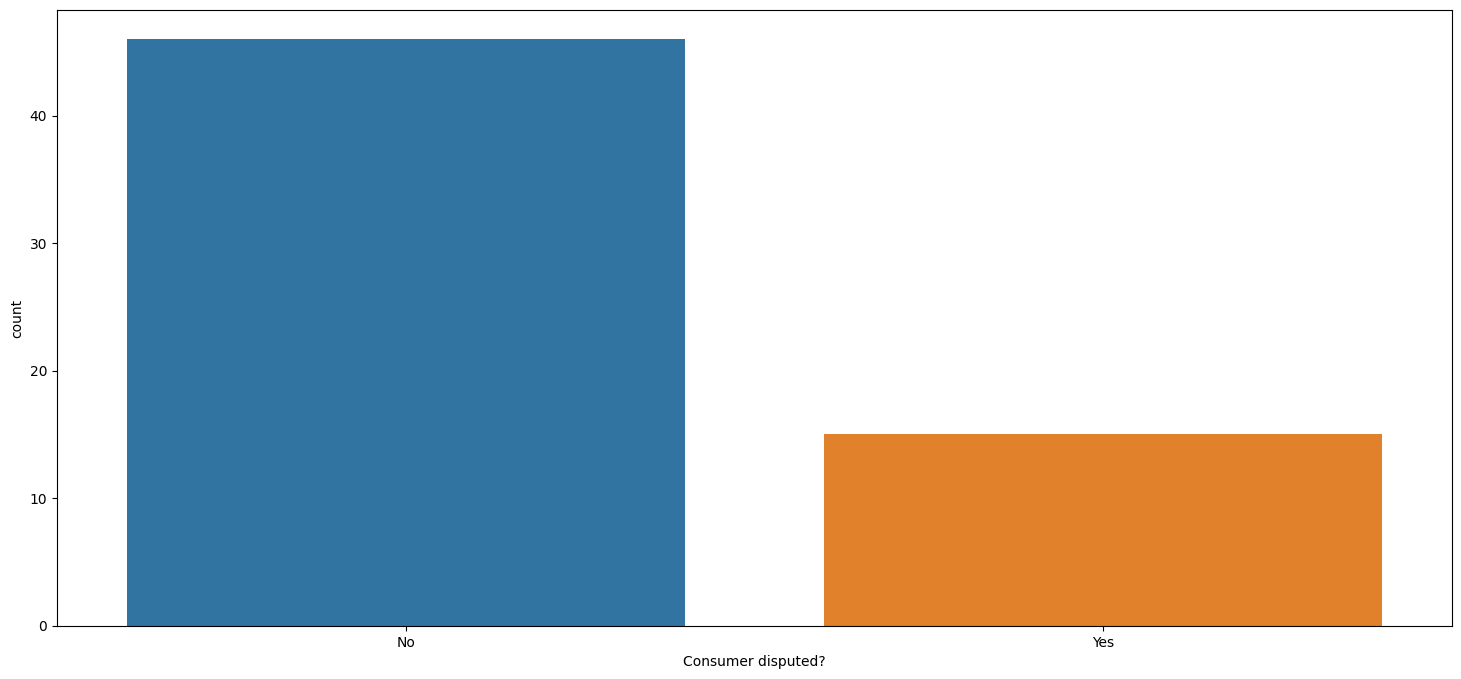

In [21]:
plt.figure(figsize=(18,8))
sns.countplot(df, x='Consumer disputed?')
plt.show()

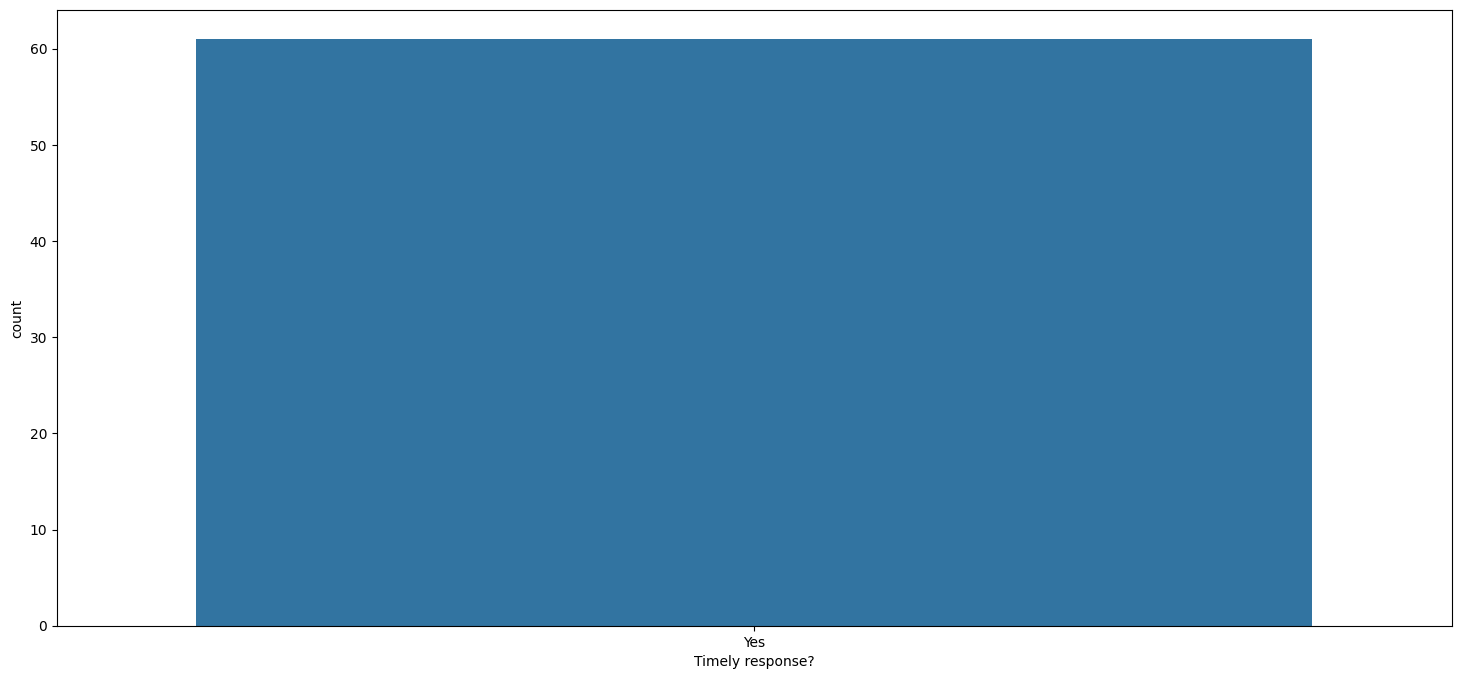

In [22]:
plt.figure(figsize=(18,8))
sns.countplot(df, x='Timely response?')
plt.show()

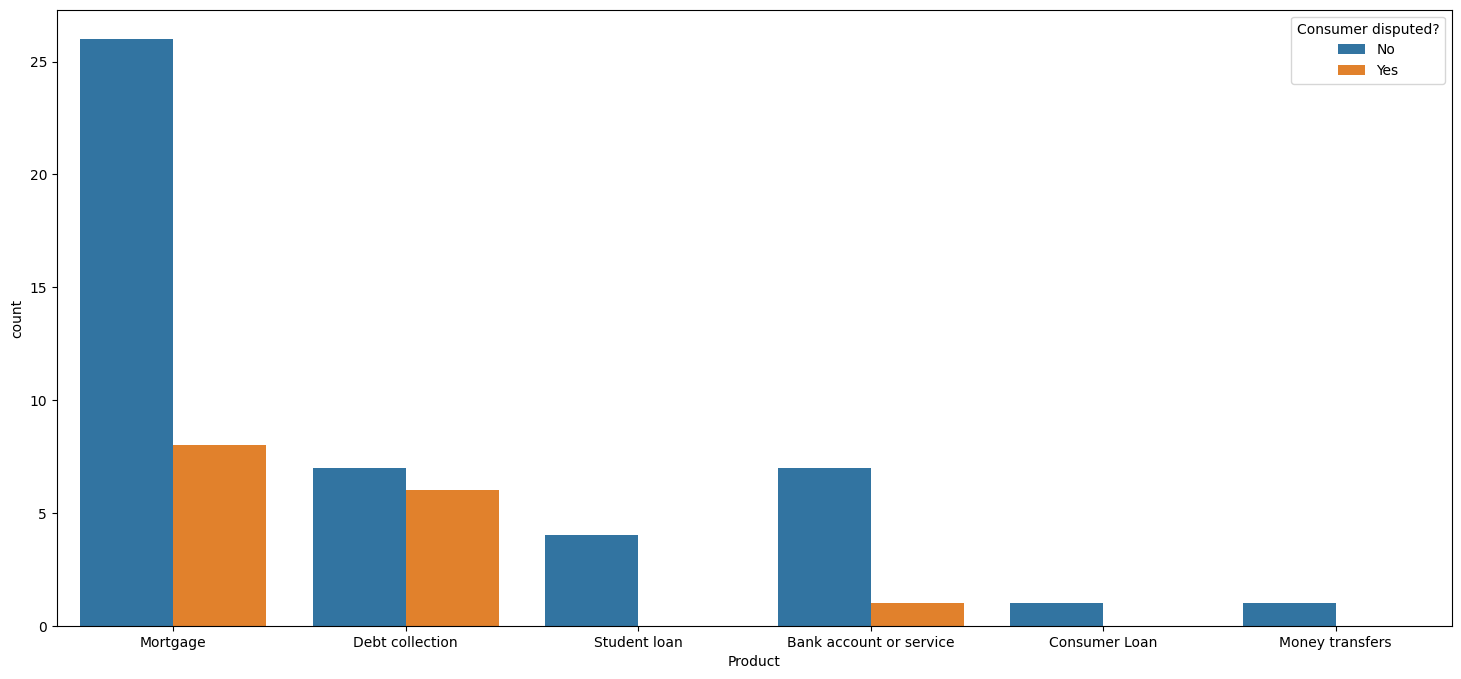

In [23]:
plt.figure(figsize=(18,8))
sns.countplot(df, x='Product', hue='Consumer disputed?')
plt.show()

Problem QUE.1

----> Here In the Product columns (MOrtage, Debt collection and Bank account or service) both value contain and other products (student loan, consumer loan and money transfer) have no complained so mostel complined in which columns we resolve that issue which factors is create to complained and what is factore which have no complained that factor may be resolve the complained issues.




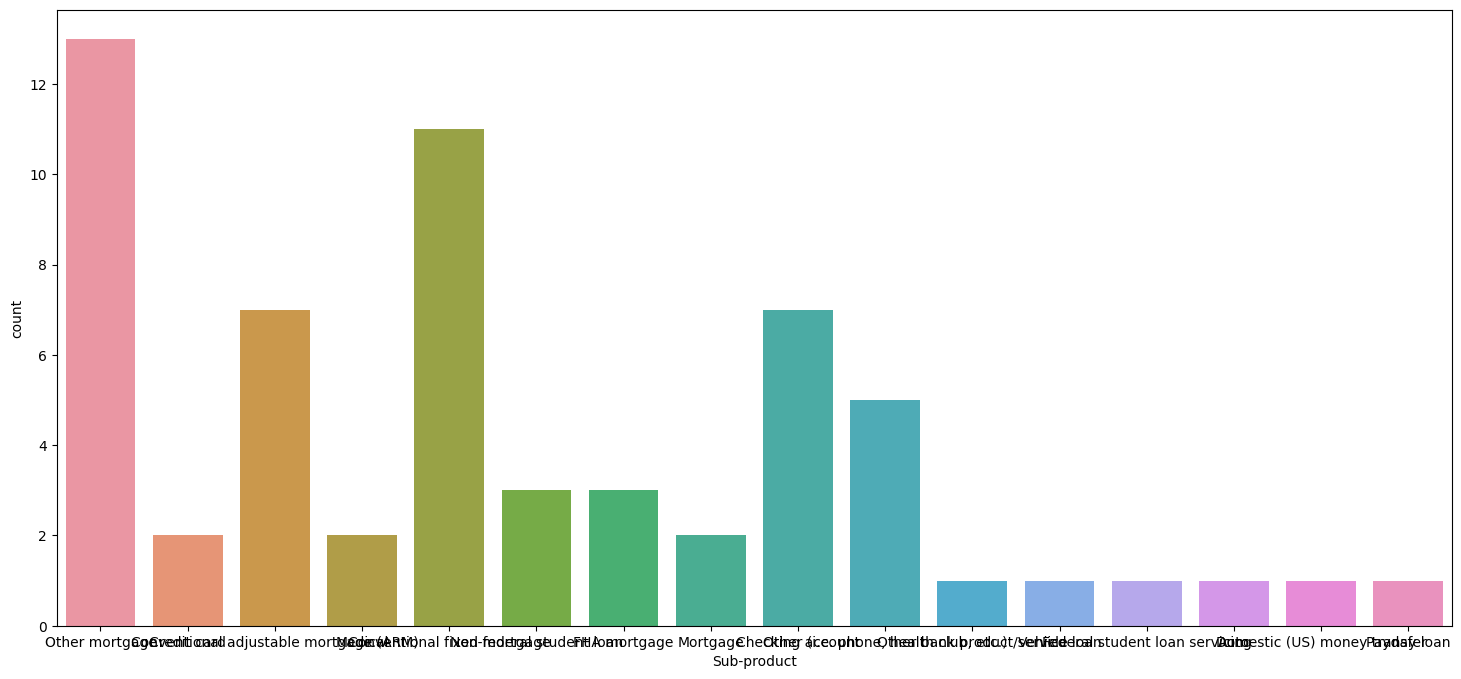

In [24]:
plt.figure(figsize=(18,8))
sns.countplot(df, x='Sub-product')
plt.show()

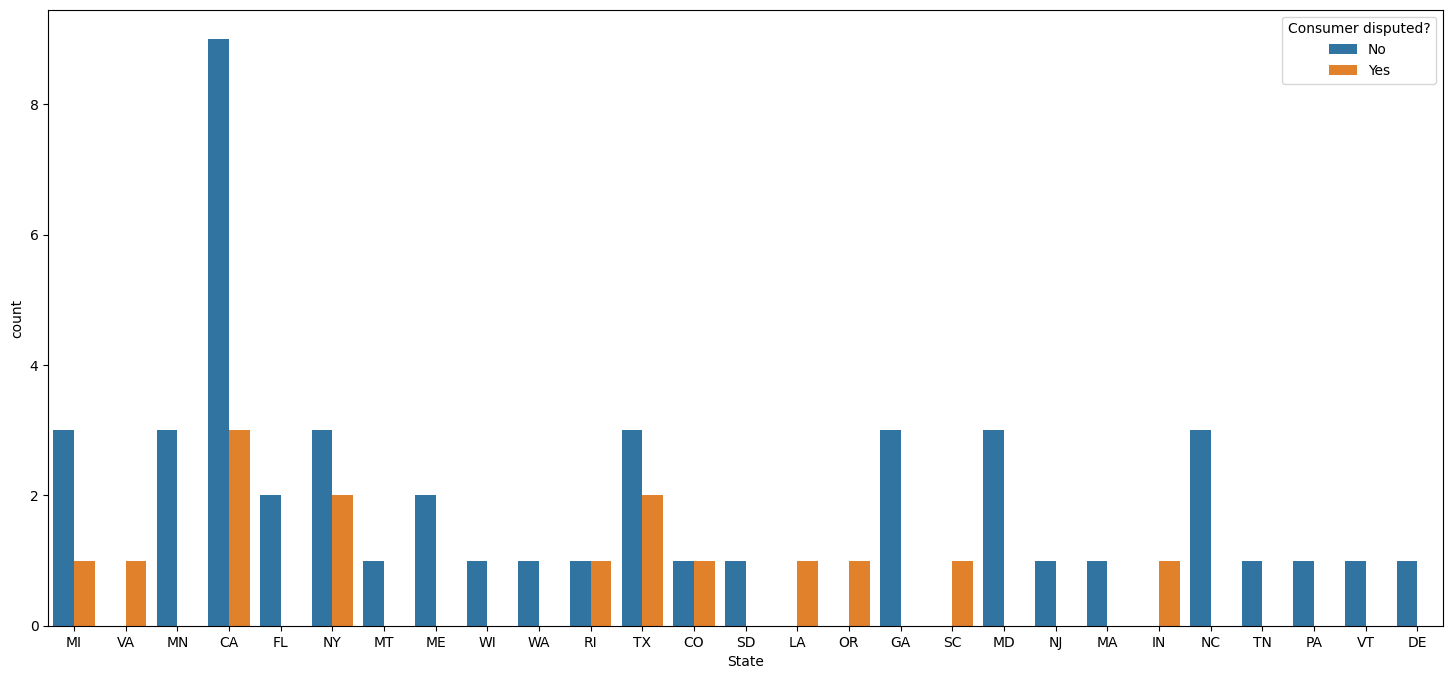

In [25]:
plt.figure(figsize=(18,8))
sns.countplot(df, x='State',hue='Consumer disputed?')
plt.show()

Problem Ques.2

---->
In the State columns maximum State have No complained so what is factore which have no complained that factor may be resolve the complained issues in other state

In [26]:
fig = px.histogram(df,
                   x='State',
                   marginal='box',
                   nbins=47,
                   color='Consumer disputed?',
                   title='Distribution of State')
fig.update_layout(bargap=0.1)
fig.show()

 Problem Ques.3

    IN the data set Mostly state have No complained few are state are Have a complained so find which factors
    create the complained and resolve it

In [27]:
fig = px.histogram(df,
                   x='Company',
                   marginal='box',
                   nbins=47,
                   color='Consumer disputed?',
                   title='Distribution of Company')
fig.update_layout(bargap=0.1)
fig.show()

Problems Ques.4
  
    1.Which companies receive the most complaints?
    2.Which companies no receive the most complaints?
    3.Are there any companies that have consistently timely responses to complaints?


In [28]:

fig = px.histogram(df,
                   x='Product',
                   marginal='box',
                   nbins=47,
                   color='State',
                   title='Distribution of Company')
fig.update_layout(bargap=0.1)
fig.show()

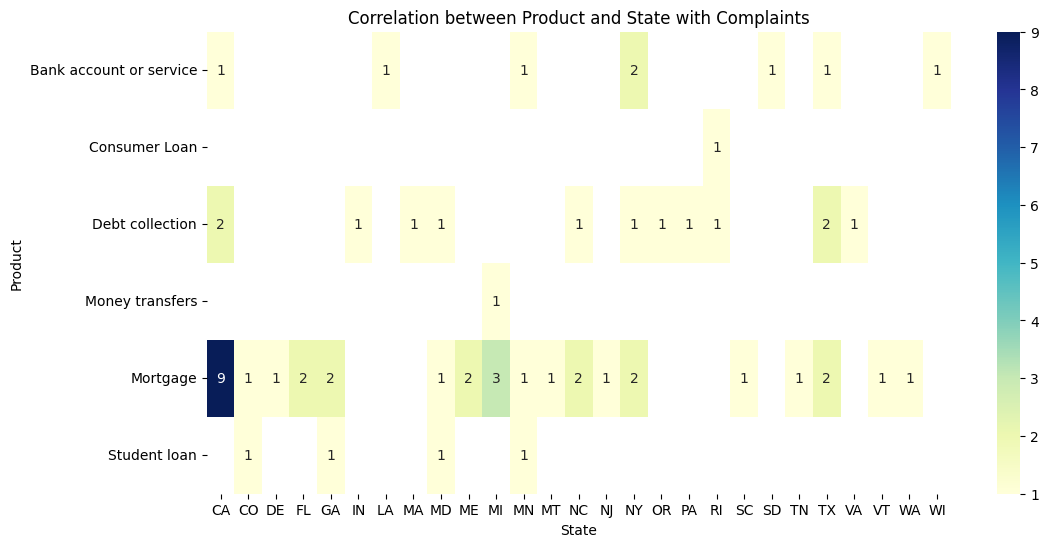

In [29]:
product_state_counts = df.groupby(['Product', 'State']).size().reset_index(name='Complaints')
# product_state_counts
plt.figure(figsize=(12, 6))
sns.heatmap(product_state_counts.pivot_table(index='Product', columns='State', values='Complaints'), cmap='YlGnBu', annot=True)
plt.title('Correlation between Product and State with Complaints')
plt.show()


Problem Ques.5

    1.Is there any correlation between the type of product and the state with the highest number of complaints for that product?
  

#Q.No:3

use some few columns which is necessary to train the model for predictionacording to me

In [30]:
column = ['Product', 'Company','State','Consumer disputed?']
data = df[column]
data

,Product,Company,State,Consumer disputed?
Date received,,,,
2014-03-12,Mortgage,M&T BANK CORPORATION,MI,No
2014-09-13,Debt collection,"CITIBANK, N.A.",VA,Yes
2013-11-13,Mortgage,U.S. BANCORP,MN,No
2015-06-16,Debt collection,California Accounts Service,CA,No
2015-11-13,Mortgage,"Aldridge Pite, LLP",CA,Yes
...,...,...,...,...
2016-06-16,Mortgage,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,No
2014-11-22,Bank account or service,JPMORGAN CHASE & CO.,TX,No
2015-02-10,Money transfers,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,No


#split dataset into input and target

In [31]:
x = data[data.columns[:-1]]
y = data['Consumer disputed?']

In [32]:
y.value_counts()

No     46
Yes    15
Name: Consumer disputed?, dtype: int64

In [33]:
column = x.columns
column

Index(['Product', 'Company', 'State'], dtype='object')

#covert categorical data into numerical data

In [34]:
categorical_columns = ['Product', 'Company', 'State']

# Perform one-hot encoding
x = pd.get_dummies(x, columns=categorical_columns)

In [35]:
x

,Product_Bank account or service,Product_Consumer Loan,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Student loan,Company_AES/PHEAA,Company_ALLY FINANCIAL INC.,"Company_Aldridge Pite, LLP",Company_Alorica Inc.,...,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_VA,State_VT,State_WA,State_WI
Date received,,,,,,,,,,,,,,,,,,,,,
2014-03-12,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-09-13,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2013-11-13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-06-16,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-11-13,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-16,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-11-22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2015-02-10,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#perform labelencoder on target column for convert into numerical column

In [36]:

lb = LabelEncoder()
y = lb.fit_transform(y)

#split dataset in train and test dataset

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(45, 70)
(45,)
(16, 70)
(16,)


#1. Train the Knn model

In [38]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)

In [39]:
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.00      0.00      0.00         4

    accuracy                           0.75        16
   macro avg       0.38      0.50      0.43        16
weighted avg       0.56      0.75      0.64        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#2. Naive Bayes Model

In [40]:
bcl = BernoulliNB(class_prior=[0.6, 0.9])
bcl.fit(x_train,y_train)
pred = bcl.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      0.25      0.33         4

    accuracy                           0.75        16
   macro avg       0.64      0.58      0.59        16
weighted avg       0.71      0.75      0.72        16



#3. SVM Model

In [41]:
svm = SVC(kernel='rbf', C=0.3, random_state=5)
svm.fit(x_train,y_train)
pred = svm.predict(x_test)
cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.00      0.00      0.00         4

    accuracy                           0.75        16
   macro avg       0.38      0.50      0.43        16
weighted avg       0.56      0.75      0.64        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(svm, x, y, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [1.         0.75       0.58333333 0.66666667 0.75      ]
Mean score: 0.75


#Summary:


*  1.KNN Model  accuray is 75
*  2.bernomial Model  accuray is 75
*  3.SVM Model accuray is also 75








#Sentiment Analysis

In [43]:
df = pd.read_csv('data_for_exam.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [58]:
sentiment_data = df[['Consumer complaint narrative', 'Consumer disputed?']]

In [59]:
sentiment_data

,Consumer complaint narrative,Consumer disputed?
0,NaN,No
1,When my loan was switched over to Navient i wa...,No
2,I tried to sign up for a spending monitoring p...,NaN
3,NaN,Yes
4,NaN,Yes
...,...,...
94,NaN,No
95,NaN,No
96,NaN,NaN
97,NaN,No


In [60]:
sentiment_data.isna().sum()

Consumer complaint narrative    83
Consumer disputed?              24
dtype: int64

In [61]:
# column = ['Consumer complaint narrative']
value = 'not available'
sentiment_data['Consumer complaint narrative'].fillna(value, inplace=True)


<ipython-input-61-a3d797f19e7a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
sentiment_data

,Consumer complaint narrative,Consumer disputed?
0,not available,No
1,When my loan was switched over to Navient i wa...,No
2,I tried to sign up for a spending monitoring p...,NaN
3,not available,Yes
4,not available,Yes
...,...,...
94,not available,No
95,not available,No
96,not available,NaN
97,not available,No


In [63]:
sentiment_data.isna().sum()

Consumer complaint narrative     0
Consumer disputed?              24
dtype: int64

In [64]:
sentiment_data.dropna(inplace=True)

<ipython-input-64-ec3fa6a134ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
sentiment_data.isna().sum()

Consumer complaint narrative    0
Consumer disputed?              0
dtype: int64

In [66]:
print(sentiment_data['Consumer disputed?'].value_counts())

No     56
Yes    19
Name: Consumer disputed?, dtype: int64


In [67]:

sentiment_data.columns = ['message', 'label']

sentiment_data.head()

,message,label
0,not available,No
1,When my loan was switched over to Navient i wa...,No
3,not available,Yes
4,not available,Yes
5,not available,No


In [68]:
# convert label to a numerical variable
sentiment_data['label_num'] = sentiment_data.label.map({'No':0, 'Yes':1})
sentiment_data.head()

<ipython-input-68-32a41bac5300>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,message,label,label_num
0,not available,No,0
1,When my loan was switched over to Navient i wa...,No,0
3,not available,Yes,1
4,not available,Yes,1
5,not available,No,0


In [71]:
sentiment_data[sentiment_data.label=='Yes'].describe()

,label_num
count,19.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


#Import Liabrary

In [73]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Text Preprocessing

In [74]:

def text_process(mess):

    STOPWORDS = stopwords.words('english')
    #Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    #Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    #Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

In [75]:
sentiment_data['clean_msg'] = sentiment_data.message.apply(text_process)

sentiment_data.head()

<ipython-input-75-99292cce6999>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,message,label,label_num,clean_msg
0,not available,No,0,available
1,When my loan was switched over to Navient i wa...,No,0,loan switched Navient never told deliquint bal...
3,not available,Yes,1,available
4,not available,Yes,1,available
5,not available,No,0,available


Split Dataset into train and test dataset

In [77]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sentiment_data.clean_msg
y = sentiment_data.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60,)
(60,)
(15,)
(15,)


#Vectorization of text columns

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (60, 252)
<class 'scipy.sparse._csr.csr_matrix'> (15, 252)


In [83]:
X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# perform TfidfTransformer

In [87]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<60x252 sparse matrix of type '<class 'numpy.float64'>'
	with 329 stored elements in Compressed Sparse Row format>

#Train Model

In [88]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

#Find Accuracy Score

In [89]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.7333333333333333
=======Confision Matrix===========


array([[11,  0],
       [ 4,  0]])

#try Another Model

In [90]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=100)
model.fit(X_train_dtm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [91]:
train_preds = model.predict(X_test_dtm)
metrics.accuracy_score(y_test, train_preds)

0.7333333333333333